<a href="https://colab.research.google.com/github/bridgetmanu/Biodiversity/blob/main/source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read file and familiarize with the content

In [21]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data1 = pd.read_csv("/home/observations.csv")
data2 = pd.read_csv("/home/species_info.csv")

# clean data
# remove NA values
data1 = data1.dropna()
data2 = data2.dropna()

# view dataframe
pd.DataFrame(data1)
pd.DataFrame(data2)


sql = sqlite3.connect("species_info.db")
data2.to_sql("species_info", sql, if_exists = "replace")
con = sql.cursor()

#Use sql to query the DataFrame

def sqlquery(status):
    obs1 = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs2 = pd.DataFrame(obs1)
    return obs2
# about 10 of the species in the dataframe are threatened
# about 16 of the species in the dataframe are Endangered

status = input("Enter a conservation status: ")
sqlquery(status)



,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


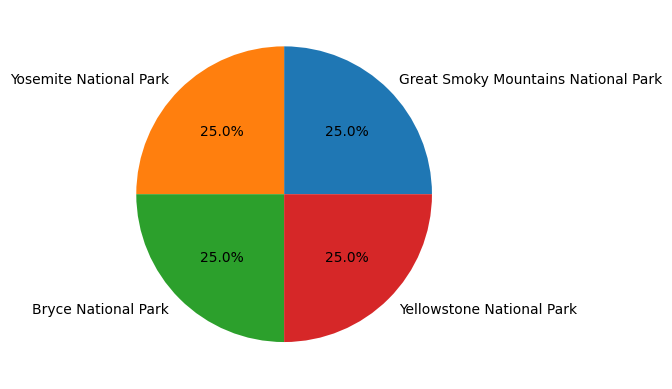

In [25]:
import matplotlib.pyplot as plt

# Pie Chart of Conservation Status in the parks

plt.pie(data2['conservation_status'].value_counts(), labels=data2['conservation_status'].unique(), autopct='%1.1f%%')
plt.show()

plt.pie(data1['park_name'].value_counts(), labels=data1['park_name'].unique(), autopct='%1.1f%%')
plt.show()

# Bar chart of Park names

plt.bar(data1['park_name'].unique(), height=data1['park_name'].value_counts())
plt.show()


About 84.3% of animals in the park are species of concern;
About 8.4% of the animals are endangered; 5.2% are threatened and 2.1% are in recovery.

There are equal amounnt of observations from each park
